In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
df = pd.read_csv('pulsar_data.csv')
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,NaN,5.732201,34.357283,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0


In [3]:
df.shape

(12528, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [5]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [6]:
df.columns = df.columns.str.strip()

In [7]:
df['target_class'].value_counts()

target_class
0.0    11375
1.0     1153
Name: count, dtype: int64

In [8]:
df['target_class'].value_counts(normalize=True)*100

target_class
0.0    90.796616
1.0     9.203384
Name: proportion, dtype: float64

In [9]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,12528.000000,12528.000000,10793.000000,12528.000000,12528.000000,11350.000000,12528.000000,11903.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,1.064708,6.208450,29.613230,19.610842,4.535783,107.399585,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.024652,-0.188142,1.910535,14.404353,5.803063,35.199899,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.473125,0.932374,5.413253,28.337418,10.727927,139.997850,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


In [10]:
df.isnull().sum()

Mean of the integrated profile                     0
Standard deviation of the integrated profile       0
Excess kurtosis of the integrated profile       1735
Skewness of the integrated profile                 0
Mean of the DM-SNR curve                           0
Standard deviation of the DM-SNR curve          1178
Excess kurtosis of the DM-SNR curve                0
Skewness of the DM-SNR curve                     625
target_class                                       0
dtype: int64

In [11]:
df = df.replace(' ?', np.nan)
df = df.dropna()

In [12]:
df.isnull().sum()

Mean of the integrated profile                  0
Standard deviation of the integrated profile    0
Excess kurtosis of the integrated profile       0
Skewness of the integrated profile              0
Mean of the DM-SNR curve                        0
Standard deviation of the DM-SNR curve          0
Excess kurtosis of the DM-SNR curve             0
Skewness of the DM-SNR curve                    0
target_class                                    0
dtype: int64

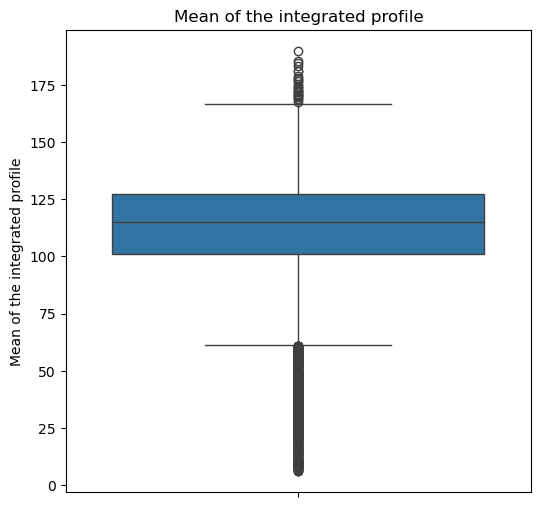

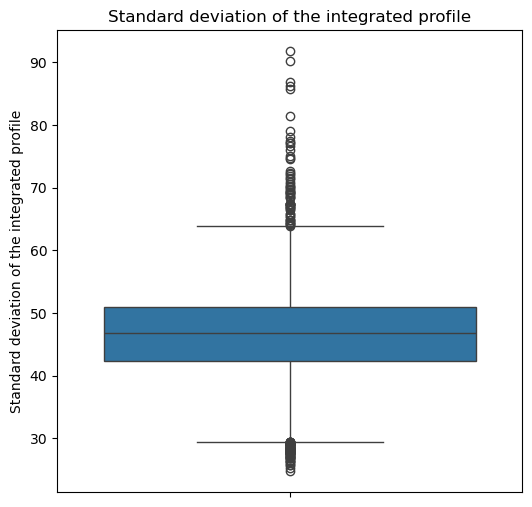

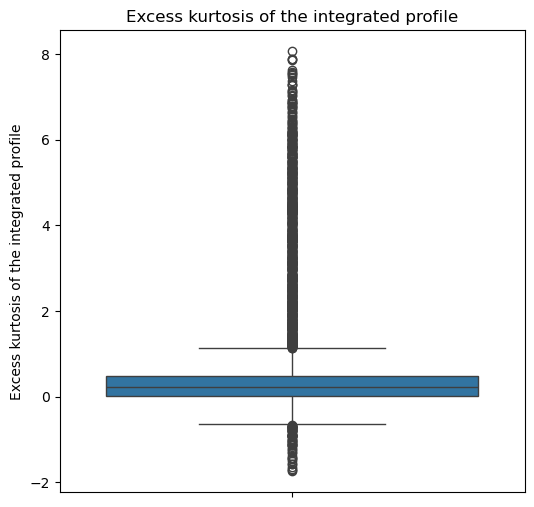

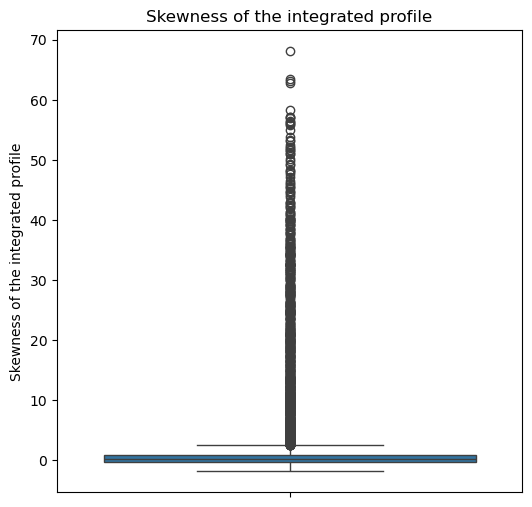

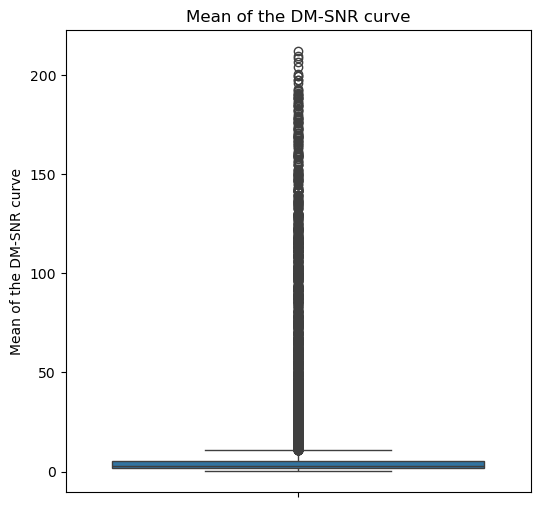

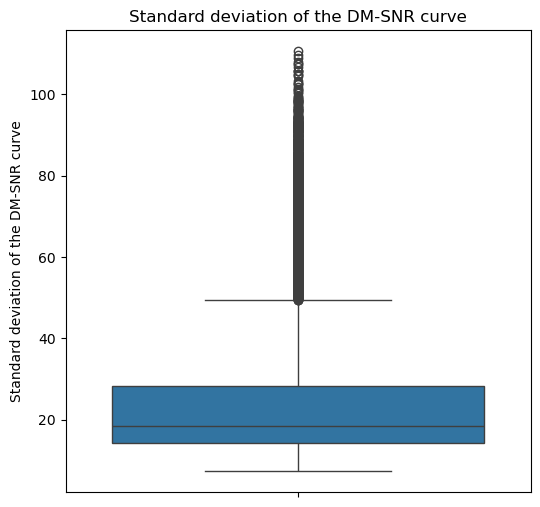

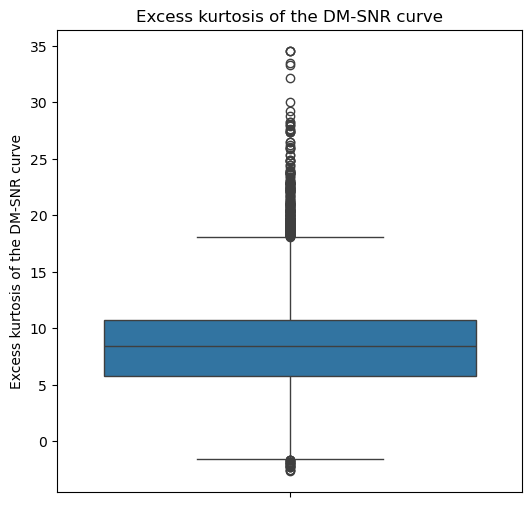

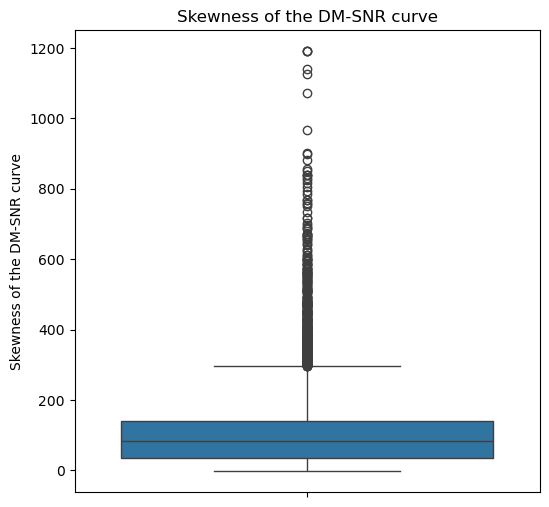

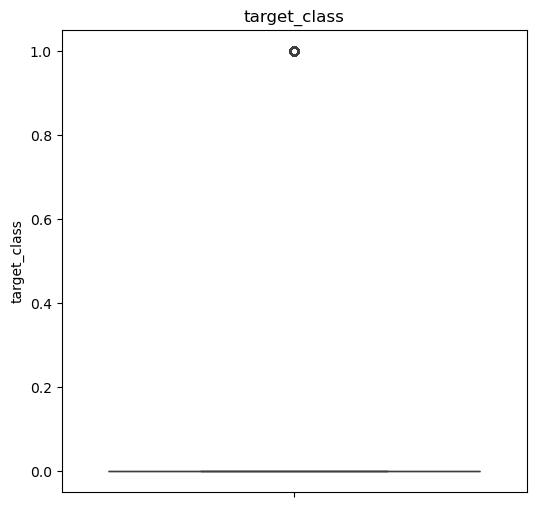

In [13]:
for col in df.columns:
    plt.figure(figsize=(6, 6))
    sns.boxplot(data=df[col])
    plt.title(col)
plt.show()

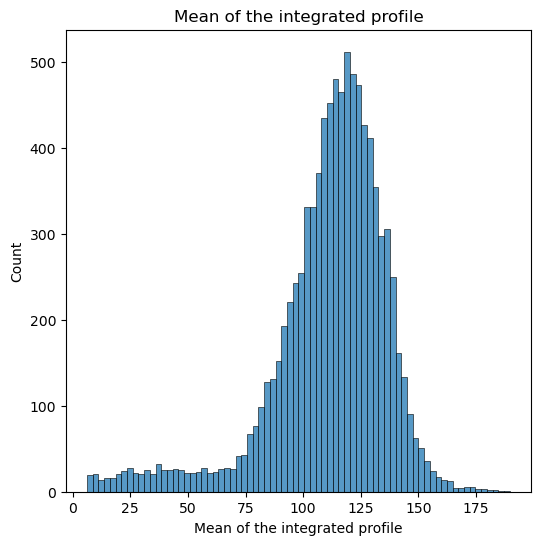

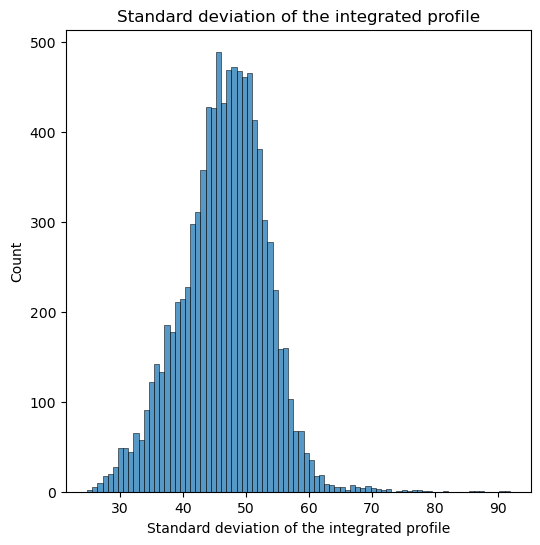

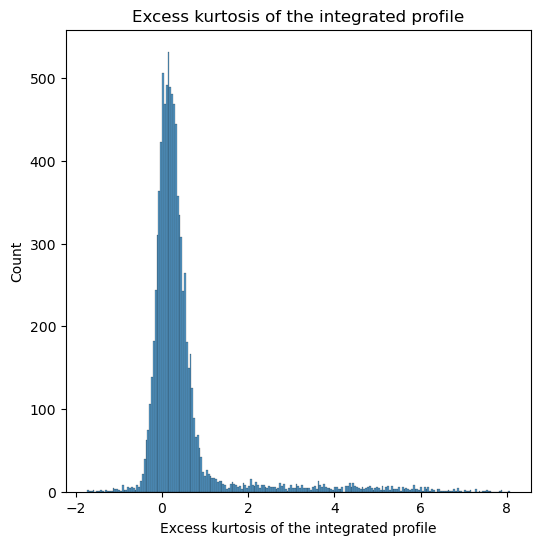

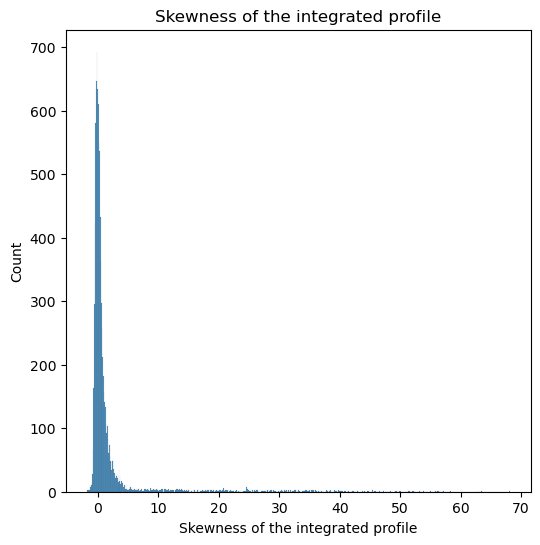

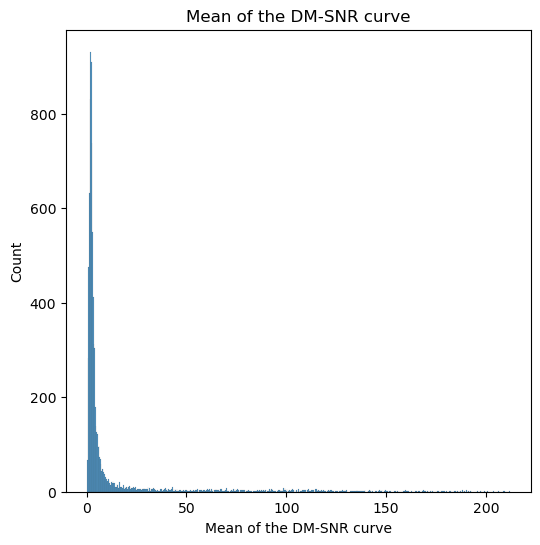

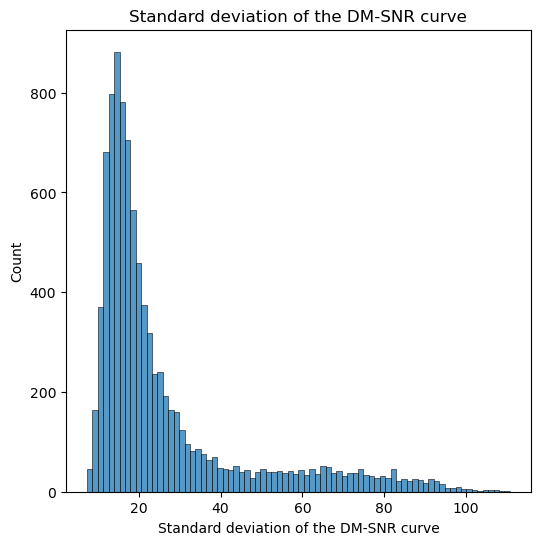

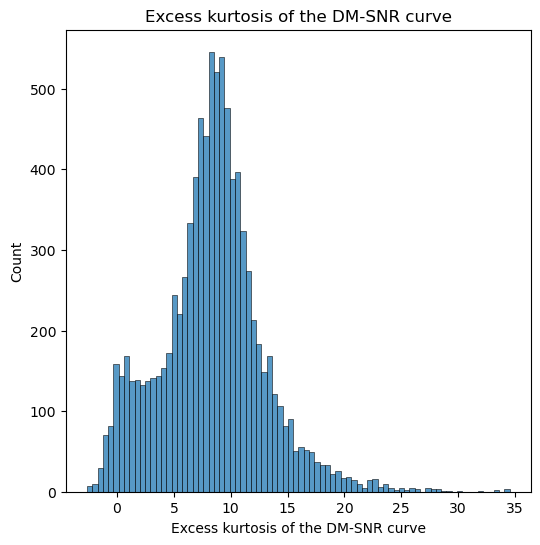

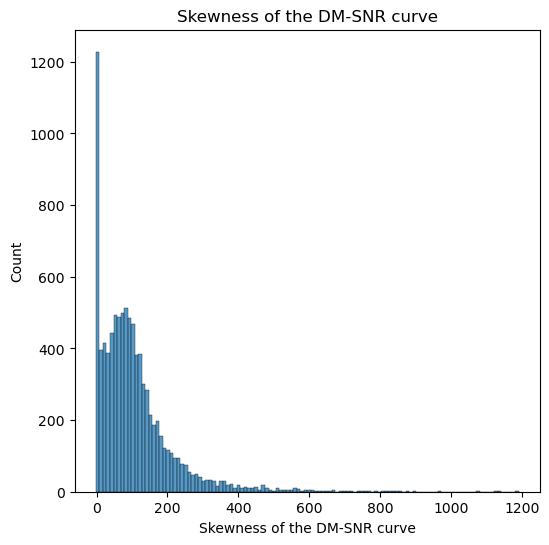

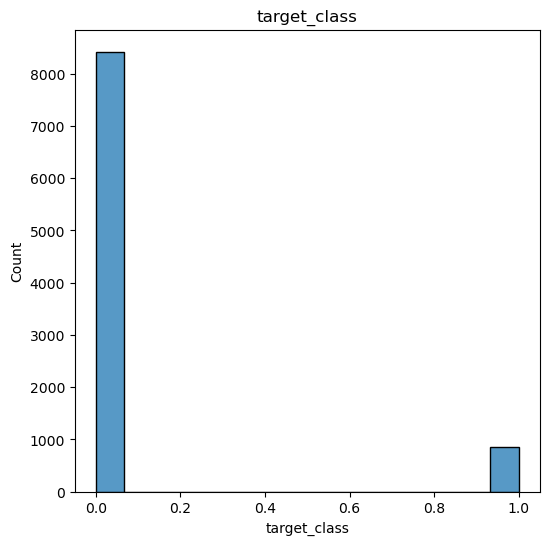

In [14]:
for col in df.columns:
    plt.figure(figsize=(6, 6))
    sns.histplot(data=df[col])
    plt.title(col)
plt.show()

In [18]:
x = df.drop('target_class', axis=1)
y = df['target_class']

In [19]:
def scaling(df):
    scaler=StandardScaler()
    for col in df.columns:
        df[col]=scaler.fit_transform(df[col].values.reshape(-1,1))
    return df

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [23]:
x_train=scaling(x_train)
x_test=scaling(x_test)

In [24]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix

In [25]:
def running_svm(model,c):
    cl=svm.SVC(kernel=model,C=c)
    return cl

In [26]:
svm_default_1=running_svm("rbf",1.0)
svm_default_2=running_svm("rbf",10.0)
svm_default_3=running_svm("rbf",100.0)

In [27]:
svm_linear_1=running_svm("linear",1.0)
svm_linear_2=running_svm("linear",10.0)
svm_linear_3=running_svm("linear",100.0)

In [28]:
svm_poly_1=running_svm("poly",1.0)
svm_poly_2=running_svm("poly",10.0)
svm_poly_3=running_svm("poly",100.0)

In [29]:
svm_sigmoid_1=running_svm("poly",1.0)
svm_sigmoid_2=running_svm("poly",10.0)
svm_sigmoid_3=running_svm("poly",100.0)

In [30]:
models = {
    'svm_rbf_C1': svm_default_1,
    'svm_rbf_C10': svm_default_2,
    'svm_rbf_C100': svm_default_3,
    'svm_linear_C1': svm_linear_1,
    'svm_linear_C10': svm_linear_2,
    'svm_linear_C100': svm_linear_3,
    'svm_poly_C1': svm_poly_1,
    'svm_poly_C10': svm_poly_2,
    'svm_poly_C100': svm_poly_3,
    'svm_sigmoid_C1': svm_sigmoid_1,
    'svm_sigmoid_C10': svm_sigmoid_2,
    'svm_sigmoid_C100': svm_sigmoid_3
}

In [31]:
def fit_test_svm(models,x_test,x_train,y_test,y_train):
    for model in models:
        mod=models[model]
        mod.fit(x_train,y_train)
        y_pred=mod.predict(x_test)
        y_train_pred=mod.predict(x_train)
        print("Model name",model)
        print("Test set metrics")
        print("Accuracy:",accuracy_score(y_test, y_pred))
        print("Precision:",precision_score(y_test, y_pred))
        print("Recall:",recall_score(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        print("Train set metrics")
        print("Accuracy:",accuracy_score(y_train,y_train_pred))
        print("Precision:",precision_score(y_train,y_train_pred))
        print("Recall:",recall_score(y_train,y_train_pred))
        print("Classification report is")
        print(classification_report(y_train,y_train_pred))
        print("confusion matrix is")
        cm=confusion_matrix(y_test,y_pred)
        sns.heatmap(cm,annot=True)
        plt.show()

Model name svm_rbf_C1
Test set metrics
Accuracy: 0.9784327821711
Precision: 0.9504504504504504
Recall: 0.8115384615384615
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2522
         1.0       0.95      0.81      0.88       260

    accuracy                           0.98      2782
   macro avg       0.97      0.90      0.93      2782
weighted avg       0.98      0.98      0.98      2782

Train set metrics
Accuracy: 0.9793560314281312
Precision: 0.943579766536965
Recall: 0.8220338983050848
Classification report is
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      5901
         1.0       0.94      0.82      0.88       590

    accuracy                           0.98      6491
   macro avg       0.96      0.91      0.93      6491
weighted avg       0.98      0.98      0.98      6491

confusion matrix is


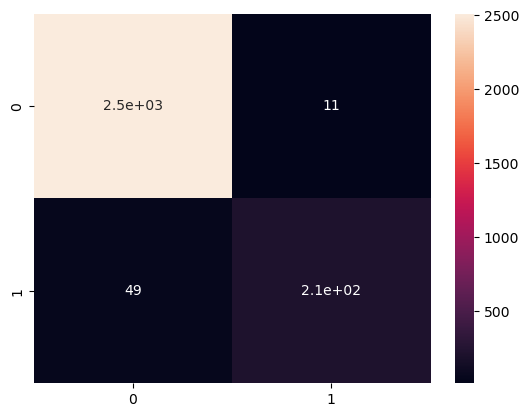

Model name svm_rbf_C10
Test set metrics
Accuracy: 0.9791516894320632
Precision: 0.954954954954955
Recall: 0.8153846153846154
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2522
         1.0       0.95      0.82      0.88       260

    accuracy                           0.98      2782
   macro avg       0.97      0.91      0.93      2782
weighted avg       0.98      0.98      0.98      2782

Train set metrics
Accuracy: 0.9824372207672162
Precision: 0.9507575757575758
Recall: 0.8508474576271187
Classification report is
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      5901
         1.0       0.95      0.85      0.90       590

    accuracy                           0.98      6491
   macro avg       0.97      0.92      0.94      6491
weighted avg       0.98      0.98      0.98      6491

confusion matrix is


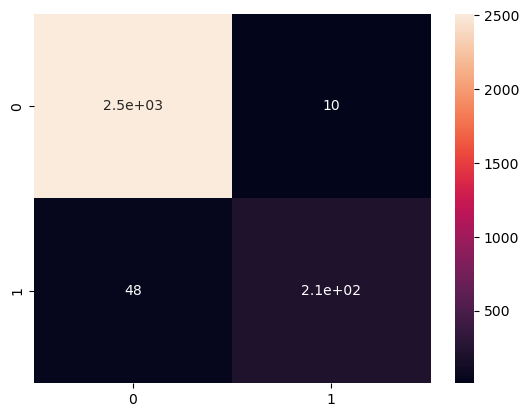

Model name svm_rbf_C100
Test set metrics
Accuracy: 0.9766355140186916
Precision: 0.9372197309417041
Recall: 0.8038461538461539
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2522
         1.0       0.94      0.80      0.87       260

    accuracy                           0.98      2782
   macro avg       0.96      0.90      0.93      2782
weighted avg       0.98      0.98      0.98      2782

Train set metrics
Accuracy: 0.9849021722384841
Precision: 0.9659090909090909
Recall: 0.864406779661017
Classification report is
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      5901
         1.0       0.97      0.86      0.91       590

    accuracy                           0.98      6491
   macro avg       0.98      0.93      0.95      6491
weighted avg       0.98      0.98      0.98      6491

confusion matrix is


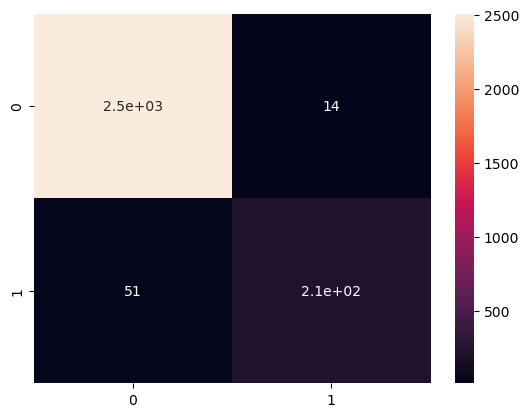

Model name svm_linear_C1
Test set metrics
Accuracy: 0.9780733285406182
Precision: 0.9461883408071748
Recall: 0.8115384615384615
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2522
         1.0       0.95      0.81      0.87       260

    accuracy                           0.98      2782
   macro avg       0.96      0.90      0.93      2782
weighted avg       0.98      0.98      0.98      2782

Train set metrics
Accuracy: 0.9788938530272685
Precision: 0.9467455621301775
Recall: 0.8135593220338984
Classification report is
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      5901
         1.0       0.95      0.81      0.88       590

    accuracy                           0.98      6491
   macro avg       0.96      0.90      0.93      6491
weighted avg       0.98      0.98      0.98      6491

confusion matrix is


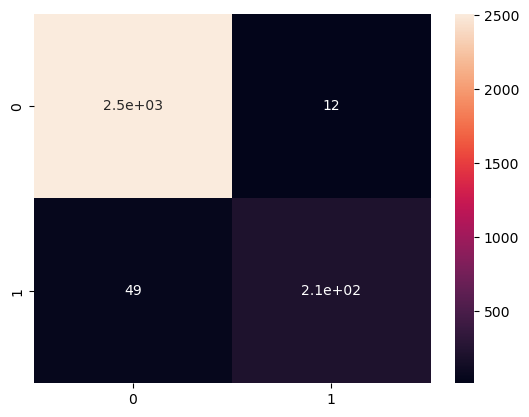

Model name svm_linear_C10
Test set metrics
Accuracy: 0.9787922358015816
Precision: 0.9466666666666667
Recall: 0.8192307692307692
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2522
         1.0       0.95      0.82      0.88       260

    accuracy                           0.98      2782
   macro avg       0.96      0.91      0.93      2782
weighted avg       0.98      0.98      0.98      2782

Train set metrics
Accuracy: 0.9802803882298567
Precision: 0.9442307692307692
Recall: 0.8322033898305085
Classification report is
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      5901
         1.0       0.94      0.83      0.88       590

    accuracy                           0.98      6491
   macro avg       0.96      0.91      0.94      6491
weighted avg       0.98      0.98      0.98      6491

confusion matrix is


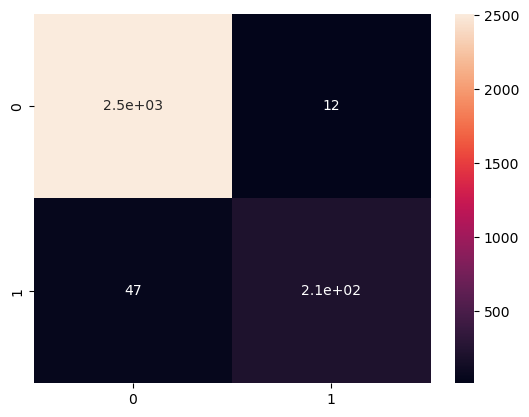

Model name svm_linear_C100
Test set metrics
Accuracy: 0.9787922358015816
Precision: 0.9466666666666667
Recall: 0.8192307692307692
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2522
         1.0       0.95      0.82      0.88       260

    accuracy                           0.98      2782
   macro avg       0.96      0.91      0.93      2782
weighted avg       0.98      0.98      0.98      2782

Train set metrics
Accuracy: 0.9802803882298567
Precision: 0.9442307692307692
Recall: 0.8322033898305085
Classification report is
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      5901
         1.0       0.94      0.83      0.88       590

    accuracy                           0.98      6491
   macro avg       0.96      0.91      0.94      6491
weighted avg       0.98      0.98      0.98      6491

confusion matrix is


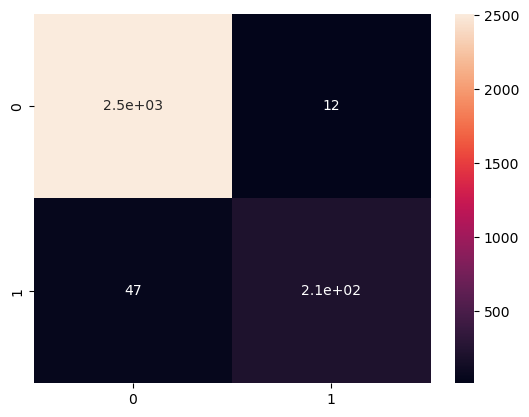

Model name svm_poly_C1
Test set metrics
Accuracy: 0.9751976994967649
Precision: 0.9441860465116279
Recall: 0.7807692307692308
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2522
         1.0       0.94      0.78      0.85       260

    accuracy                           0.98      2782
   macro avg       0.96      0.89      0.92      2782
weighted avg       0.97      0.98      0.97      2782

Train set metrics
Accuracy: 0.9765829610229548
Precision: 0.9524793388429752
Recall: 0.7813559322033898
Classification report is
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      5901
         1.0       0.95      0.78      0.86       590

    accuracy                           0.98      6491
   macro avg       0.97      0.89      0.92      6491
weighted avg       0.98      0.98      0.98      6491

confusion matrix is


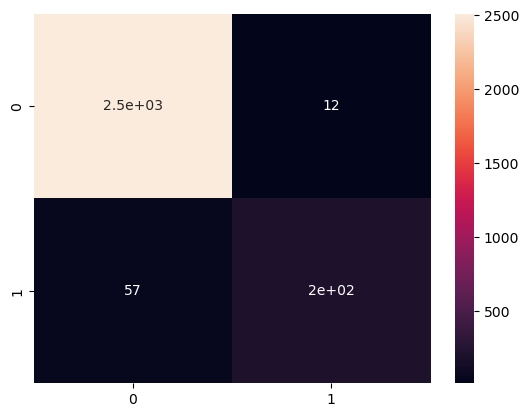

Model name svm_poly_C10
Test set metrics
Accuracy: 0.9766355140186916
Precision: 0.9372197309417041
Recall: 0.8038461538461539
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2522
         1.0       0.94      0.80      0.87       260

    accuracy                           0.98      2782
   macro avg       0.96      0.90      0.93      2782
weighted avg       0.98      0.98      0.98      2782

Train set metrics
Accuracy: 0.9790479124942227
Precision: 0.9486166007905138
Recall: 0.8135593220338984
Classification report is
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      5901
         1.0       0.95      0.81      0.88       590

    accuracy                           0.98      6491
   macro avg       0.97      0.90      0.93      6491
weighted avg       0.98      0.98      0.98      6491

confusion matrix is


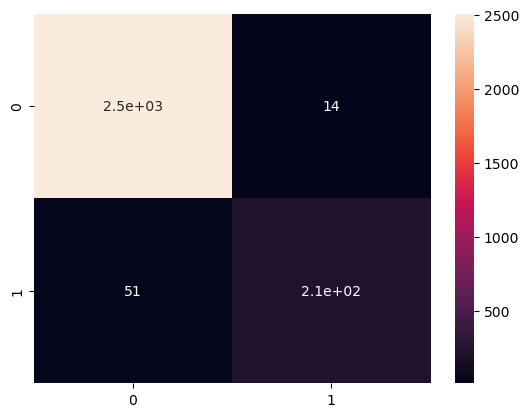

Model name svm_poly_C100
Test set metrics
Accuracy: 0.9762760603882099
Precision: 0.9217391304347826
Recall: 0.8153846153846154
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2522
         1.0       0.92      0.82      0.87       260

    accuracy                           0.98      2782
   macro avg       0.95      0.90      0.93      2782
weighted avg       0.98      0.98      0.98      2782

Train set metrics
Accuracy: 0.9805885071637652
Precision: 0.9478764478764479
Recall: 0.8322033898305085
Classification report is
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      5901
         1.0       0.95      0.83      0.89       590

    accuracy                           0.98      6491
   macro avg       0.97      0.91      0.94      6491
weighted avg       0.98      0.98      0.98      6491

confusion matrix is


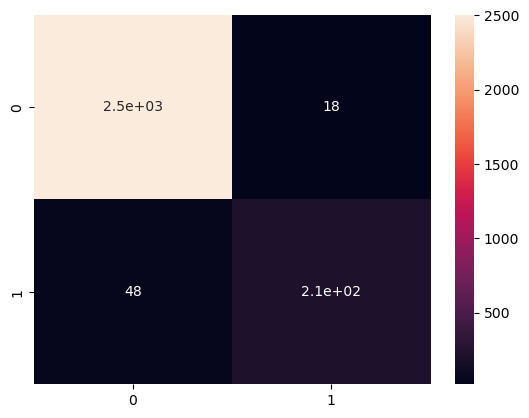

Model name svm_sigmoid_C1
Test set metrics
Accuracy: 0.9751976994967649
Precision: 0.9441860465116279
Recall: 0.7807692307692308
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2522
         1.0       0.94      0.78      0.85       260

    accuracy                           0.98      2782
   macro avg       0.96      0.89      0.92      2782
weighted avg       0.97      0.98      0.97      2782

Train set metrics
Accuracy: 0.9765829610229548
Precision: 0.9524793388429752
Recall: 0.7813559322033898
Classification report is
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      5901
         1.0       0.95      0.78      0.86       590

    accuracy                           0.98      6491
   macro avg       0.97      0.89      0.92      6491
weighted avg       0.98      0.98      0.98      6491

confusion matrix is


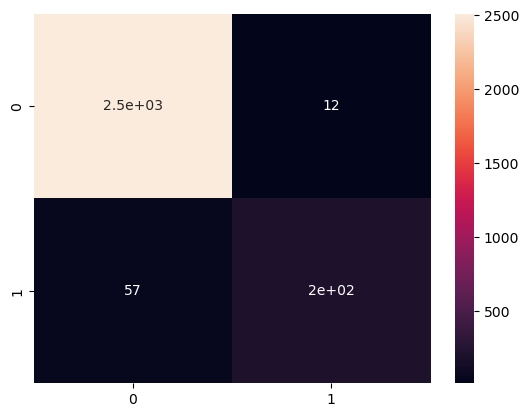

Model name svm_sigmoid_C10
Test set metrics
Accuracy: 0.9766355140186916
Precision: 0.9372197309417041
Recall: 0.8038461538461539
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2522
         1.0       0.94      0.80      0.87       260

    accuracy                           0.98      2782
   macro avg       0.96      0.90      0.93      2782
weighted avg       0.98      0.98      0.98      2782

Train set metrics
Accuracy: 0.9790479124942227
Precision: 0.9486166007905138
Recall: 0.8135593220338984
Classification report is
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      5901
         1.0       0.95      0.81      0.88       590

    accuracy                           0.98      6491
   macro avg       0.97      0.90      0.93      6491
weighted avg       0.98      0.98      0.98      6491

confusion matrix is


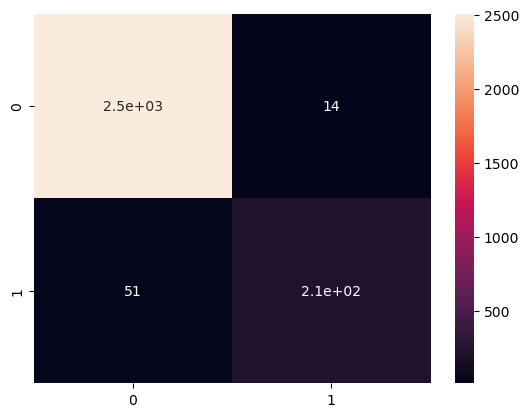

Model name svm_sigmoid_C100
Test set metrics
Accuracy: 0.9762760603882099
Precision: 0.9217391304347826
Recall: 0.8153846153846154
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2522
         1.0       0.92      0.82      0.87       260

    accuracy                           0.98      2782
   macro avg       0.95      0.90      0.93      2782
weighted avg       0.98      0.98      0.98      2782

Train set metrics
Accuracy: 0.9805885071637652
Precision: 0.9478764478764479
Recall: 0.8322033898305085
Classification report is
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      5901
         1.0       0.95      0.83      0.89       590

    accuracy                           0.98      6491
   macro avg       0.97      0.91      0.94      6491
weighted avg       0.98      0.98      0.98      6491

confusion matrix is


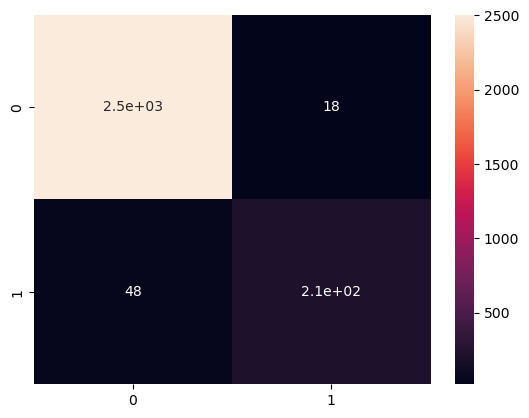

In [32]:
fit_test_svm(models,x_test,x_train,y_test,y_train)

In [35]:
from sklearn import metrics
def plot_roc_auc(models,x_test,x_train,y_test,y_train):
    for model in models:
        mod=models[model]
        mod.fit(x_train,y_train)
        y_pred=mod.predict(x_test)
        fpr,tpr,_ =metrics.roc_curve(y_test,y_pred)
        auc=metrics.roc_auc_score(y_test,y_pred)
        plt.title('Roc and Auc for Model '+str(model))
        plt.plot(fpr,tpr,label="AUC="+str(auc))
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()  

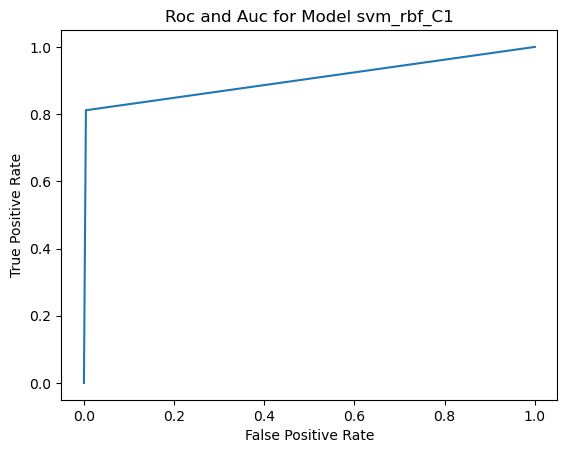

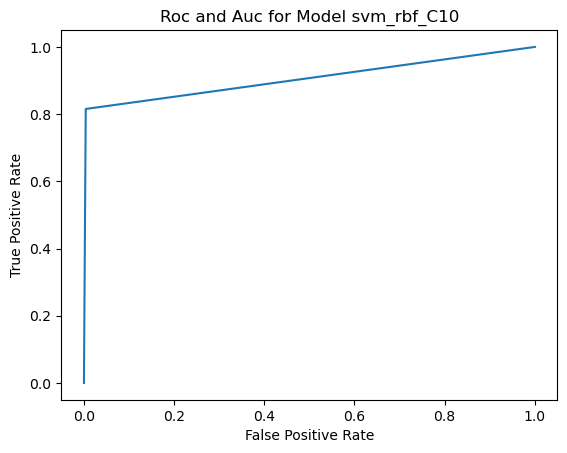

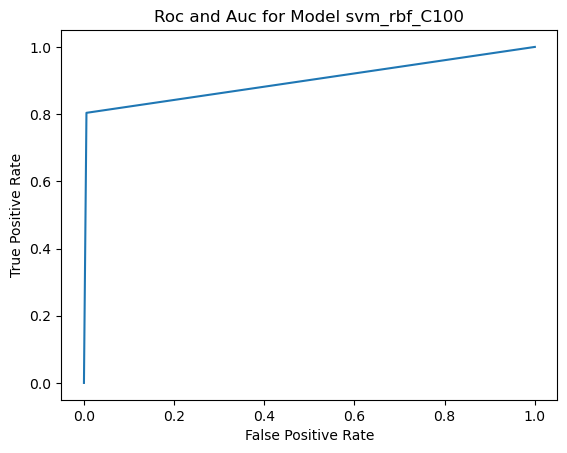

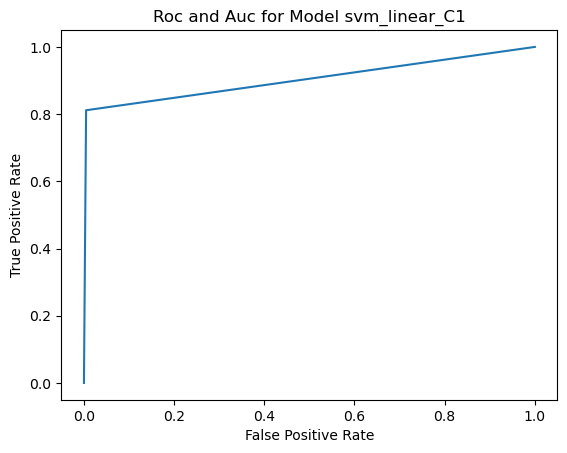

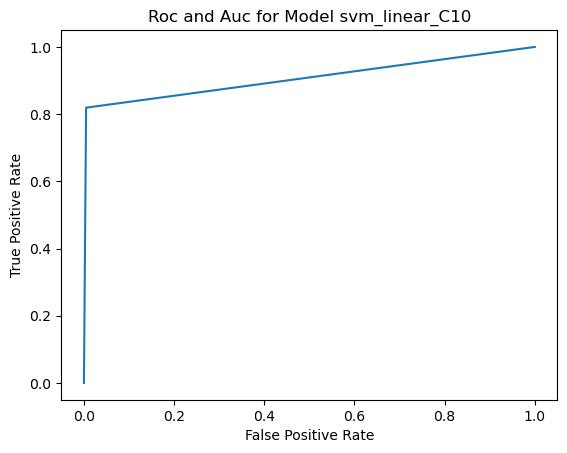

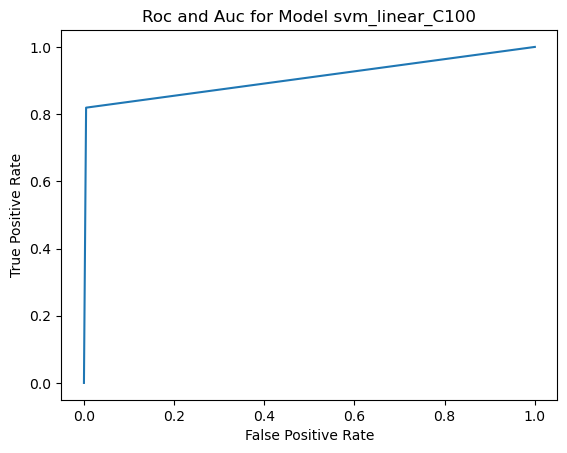

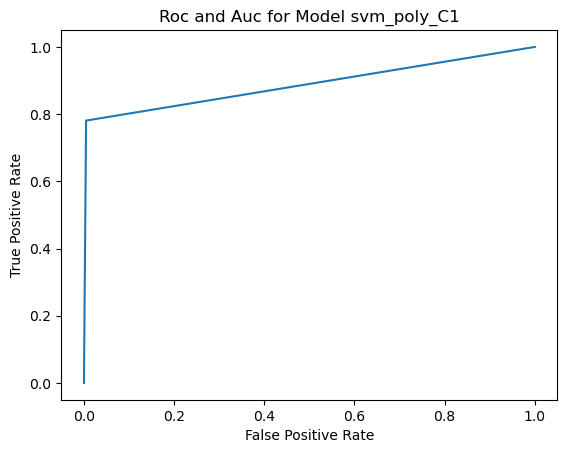

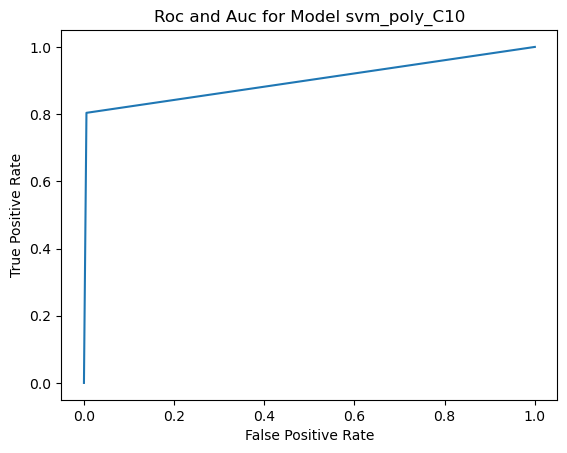

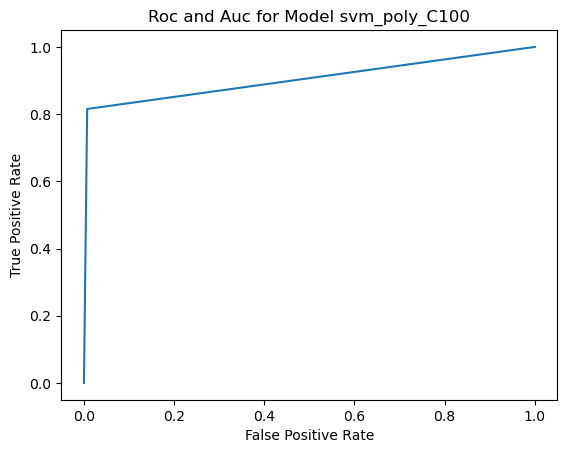

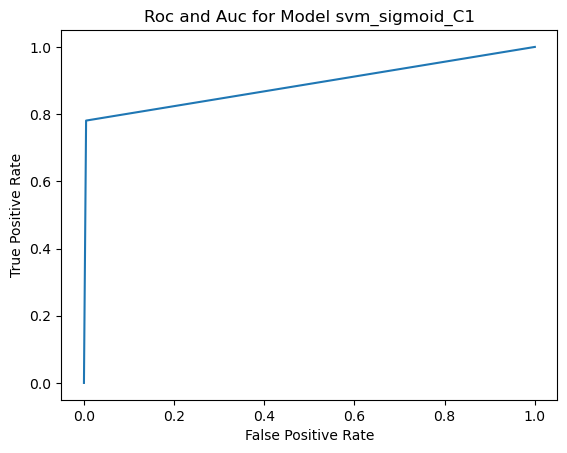

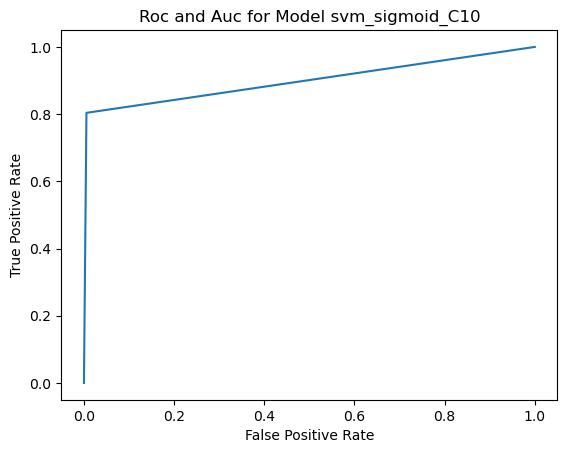

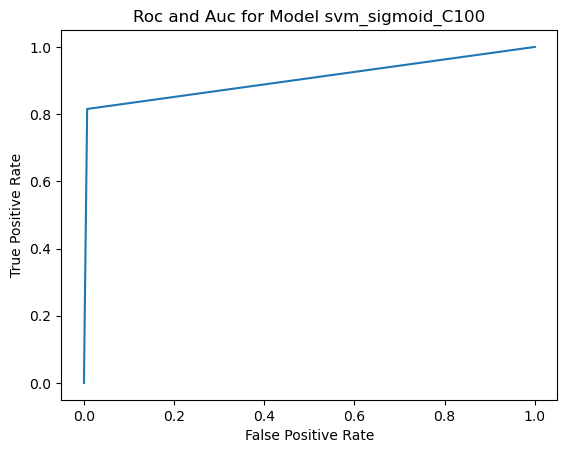

In [36]:
plot_roc_auc(models,x_test,x_train,y_test,y_train)

In [41]:
from sklearn.model_selection import StratifiedKFold, ShuffleSplit, StratifiedShuffleSplit, cross_val_score
from sklearn.svm import SVC


linear_svm = SVC(kernel='linear')
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
linear_cv_scores = cross_val_score(linear_svm, x_train, y_train, cv=skf)
print("\nCross-validation scores for Linear SVM:")
print(linear_cv_scores)


rbf_svm = SVC(kernel='rbf')
rbf_cv_scores = cross_val_score(rbf_svm, x_train, y_train, cv=skf)
print("\nCross-validation scores for RBF SVM:")
print(rbf_cv_scores)


poly_svm = SVC(kernel='poly', degree=2)
poly_cv_scores = cross_val_score(poly_svm, x_train, y_train, cv=skf)
print("\nCross-validation scores for Polynomial SVM:")
print(poly_cv_scores)


sigmoid_svm = SVC(kernel='sigmoid')
sigmoid_cv_scores = cross_val_score(sigmoid_svm, x_train, y_train, cv=skf)
print("\nCross-validation scores for Sigmoid SVM:")
print(sigmoid_cv_scores)



Cross-validation scores for Linear SVM:
[0.97536567 0.98151002 0.98690293 0.97842835 0.97226502]

Cross-validation scores for RBF SVM:
[0.97382602 0.97996918 0.98767334 0.97457627 0.97149461]

Cross-validation scores for Polynomial SVM:
[0.96997691 0.97765794 0.98228043 0.97457627 0.96687211]

Cross-validation scores for Sigmoid SVM:
[0.86143187 0.88289676 0.87827427 0.87288136 0.86286595]


In [45]:
def stratified_shuffle_split(models, x, y):
    results = {}
    for model_name, model_instance in models.items():
        sss = StratifiedShuffleSplit(n_splits=2, test_size=0.3, random_state=0)
        scores = []
        for train_index, test_index in sss.split(x, y):
            x_train, x_test = np.array(x)[train_index], np.array(x)[test_index]
            y_train, y_test = np.array(y)[train_index], np.array(y)[test_index]
            try:
                model_instance.fit(x_train, y_train)
                pred = model_instance.predict(x_test)
                scores.append(accuracy_score(y_test, pred))
            except Exception as e:
                print(f"Error occurred with model {model_name}: {str(e)}")
                scores.append(None)
        results[model_name] = scores
        print('Shuffle split scores for model:', model_name)
        print(scores)
    return results

results=stratified_shuffle_split(models,x,y)

Shuffle split scores for model: svm_rbf_C1
[0.9780733285406182, 0.9712437095614666]
Shuffle split scores for model: svm_rbf_C10
[0.9791516894320632, 0.9723220704529115]
Shuffle split scores for model: svm_rbf_C100
[0.9813084112149533, 0.9773544212796549]
Shuffle split scores for model: svm_linear_C1
[0.9834651329978433, 0.9780733285406182]
Shuffle split scores for model: svm_linear_C10
[0.983824586628325, 0.9780733285406182]
Shuffle split scores for model: svm_linear_C100
[0.98274622573688, 0.9798705966930266]
Shuffle split scores for model: svm_poly_C1
[0.9762760603882099, 0.9701653486700216]
Shuffle split scores for model: svm_poly_C10
[0.9769949676491733, 0.9726815240833933]
Shuffle split scores for model: svm_poly_C100
[0.9798705966930266, 0.9744787922358016]
Shuffle split scores for model: svm_sigmoid_C1
[0.9762760603882099, 0.9701653486700216]
Shuffle split scores for model: svm_sigmoid_C10
[0.9769949676491733, 0.9726815240833933]
Shuffle split scores for model: svm_sigmoid_C100
